In [2]:
# Utilice este espacio para escribir el código.
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
evaluaciones = pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA.csv')

<ipython-input-3-25984f419953>:1: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  evaluaciones = pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA.csv')


In [4]:
evaluaciones

,COD. \nDEP.,DEPARTAMENTO,COD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,...,Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,"2,006",2006B,...,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,NaN,NaN,CULTIVO,NaN,CICLO DE CULTIVO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,"2,006",2006B,...,"1,440",18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,NaN,NaN,ACELGA,NaN,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,"2,006",2006B,...,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,NaN,NaN,ACHICORIA,NaN,ANUAL
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,"2,006",2006B,...,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,NaN,NaN,MALANGA,NaN,PERMANENTE
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,"2,006",2006B,...,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,NaN,NaN,ACHIRA,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,"2,017",2017B,...,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,NaN,NaN,NaN,NaN,NaN
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,"2,017",2017B,...,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,NaN,NaN,NaN,NaN,NaN
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,"2,018",2018A,...,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,NaN,NaN,NaN,NaN,NaN
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,"2,018",2018A,...,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,NaN,NaN,NaN,NaN,NaN


In [5]:
evaluaciones.nunique()

COD. \nDEP.                                         32
DEPARTAMENTO                                        32
COD. MUN.                                         1105
MUNICIPIO                                         1018
GRUPO \nDE CULTIVO                                  13
SUBGRUPO \nDE CULTIVO                              120
CULTIVO                                            223
DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO      271
AÑO                                                 13
PERIODO                                             36
Área Sembrada\n(ha)                               5023
Área Cosechada\n(ha)                              4557
Producción\n(t)                                  10230
Rendimiento\n(t/ha)                               3621
ESTADO FISICO PRODUCCION                            23
NOMBRE \nCIENTIFICO                                214
CICLO DE CULTIVO                                     3
Unnamed: 17                                          0
Unnamed: 1

In [6]:
evaluaciones2=evaluaciones[['COD. MUN.', 'CULTIVO']]

In [7]:
pivot = np.round(pd.pivot_table(evaluaciones2, index='COD. MUN.',
                                columns='CULTIVO', aggfunc= len, fill_value=0))

In [8]:
pivot.reset_index(inplace=True)

In [9]:
pivot

CULTIVO,COD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,AJI,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,5001,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,12,24,0,0
1,5002,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,10,0,0,0
4,5030,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,97666,0,0,0,0,0,0,0,0,1,...,0,2,0,1,0,0,10,0,0,2
1101,99001,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,12,0,0,0
1102,99524,0,0,0,0,0,5,0,7,0,...,0,0,0,0,0,0,15,0,0,0
1103,99624,0,0,0,0,0,0,0,16,0,...,0,0,0,0,0,0,12,0,0,0


In [10]:
pivot['DPTOMPIO']=pivot['COD. MUN.']

In [11]:
municipios=gpd.read_file("MunicipiosVeredas19MB.json")

In [12]:
municipios.nunique()

DPTOMPIO      1121
DPTO_CCDGO      33
MPIO_CCDGO     580
MPIO_CNMBR    1036
MPIO_CCNCT    1121
geometry      1121
dtype: int64

In [13]:
municipios['DPTOMPIO']=municipios[['DPTOMPIO']].apply(pd.to_numeric)

In [14]:
municipios

,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,5001,05,001,MEDELLÍN,05001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,5002,05,002,ABEJORRAL,05002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,5004,05,004,ABRIAQUÍ,05004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,5021,05,021,ALEJANDRÍA,05021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,5030,05,030,AMAGÁ,05030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...,...,...,...,...
1116,97889,97,889,YAVARATÉ,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,99,001,PUERTO CARREÑO,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,99,524,LA PRIMAVERA,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,99,624,SANTA ROSALÍA,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


In [15]:
municipios2=municipios[['DPTOMPIO','geometry']]

In [16]:
municipios2

,DPTOMPIO,geometry
0,5001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,5002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,5004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,5021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,5030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...
1116,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


In [73]:
pivot = pivot.astype({'COD. MUN.':'int'})
municipios3=pd.merge(municipios2,pivot, left_on='DPTOMPIO', right_on='DPTOMPIO')


In [18]:
municipios3

,DPTOMPIO,geometry,COD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,5001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,...,0,0,0,0,0,0,12,24,0,0
1,5002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,...,0,0,0,0,0,0,10,0,0,0
4,5030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,97666,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,...,0,2,0,1,0,0,10,0,0,2
1100,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
1101,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,...,0,0,0,0,0,0,15,0,0,0
1102,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0


In [19]:
municipios3 = municipios3.iloc[: , 1:]
municipios3

,geometry,COD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,12,24,0,0
1,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,10,0,0,0
4,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,10,0,0,2
1100,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,12,0,0,0
1101,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,7,...,0,0,0,0,0,0,15,0,0,0
1102,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,12,0,0,0


In [20]:
from sklearn import metrics
metrics.pairwise_distances(
    municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'COD. MUN.'])].head()
).round(4)

array([[  0.    , 103.0776, 106.4049, 101.7349, 106.3297],
       [103.0776,   0.    ,  33.7787,  40.5586,  49.2646],
       [106.4049,  33.7787,   0.    ,  27.1293,  43.6119],
       [101.7349,  40.5586,  27.1293,   0.    ,  44.1814],
       [106.3297,  49.2646,  43.6119,  44.1814,   0.    ]])

In [21]:
from sklearn.preprocessing import robust_scale
db_scaled = robust_scale(municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'COD. MUN.'])])

In [22]:
# Initialize KMeans instance
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=13)

In [24]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k13cls = kmeans.fit(db_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
k13cls.labels_[:5]


array([6, 2, 2, 2, 2], dtype=int32)

In [26]:
municipios3["k13cls"] = k13cls.labels_


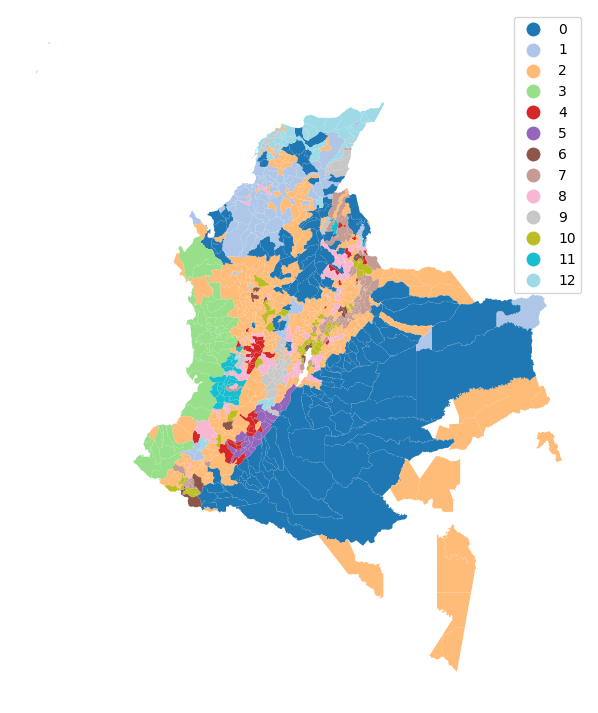

In [27]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k13cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [28]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=479c3c5bf4e0f2ded1f845f4a63aa39590ba24709dcd9af54e1a12419eece0ba
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [51]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES


# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(db_scaled, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(db_scaled, initial_centers, 20)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())




Total WCE: 537427.6712441526


In [52]:
len(clusters)

15

In [56]:
clusters = pd.DataFrame(clusters)

In [57]:
clusters

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,41,113,153,161,162,163,168,182,187,266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,93,96,112,145,154,157,158,159,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,126,127,128,129,130,131,132,133,134,135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,15,20,29,39,47,66,87,102,107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,3,4,6,8,9,10,11,12,...,1085.0,1087.0,1088.0,1089.0,1090.0,1091.0,1092.0,1097.0,1098.0,1099.0
5,60,63,84,91,101,105,114,143,195,197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,76,231,233,234,240,246,297,299,302,321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,13,24,31,44,67,73,74,79,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,35,71,123,150,151,155,169,172,173,181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,119,572,574,575,576,577,578,579,580,582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
cluster_idx=pd.read_csv("cluster_idx.csv")

In [65]:
cluster_idx

,idx,Cluster
0,41,0
1,113,0
2,153,0
3,161,0
4,162,0
...,...,...
1099,1035,14
1100,1037,14
1101,1038,14
1102,1039,14


In [66]:
municipios3

,geometry,COD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,...,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME,k13cls,k13clsPCA,k10cls,k27cls,k6cls
0,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,0,...,0,12,24,0,0,6,8,0,14,4
1,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,0,...,0,0,0,0,0,2,9,1,12,5
2,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,0,...,0,0,0,0,0,2,9,1,12,5
3,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,0,...,0,10,0,0,0,2,9,1,12,5
4,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,0,...,0,12,0,0,0,2,9,1,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,0,...,0,10,0,0,2,2,11,1,0,1
1100,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,11,...,0,12,0,0,0,1,6,2,0,1
1101,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,7,...,0,15,0,0,0,0,11,2,0,1
1102,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,16,...,0,12,0,0,0,1,11,2,0,1


In [74]:

municipios5=municipios3
municipios5.reset_index(inplace=True)

In [75]:
municipios5

,index,DPTOMPIO,geometry,COD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,0,5001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,...,0,0,0,0,0,0,12,24,0,0
1,1,5002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
2,2,5004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
3,3,5021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,...,0,0,0,0,0,0,10,0,0,0
4,4,5030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1099,97666,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,...,0,2,0,1,0,0,10,0,0,2
1100,1100,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
1101,1101,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,...,0,0,0,0,0,0,15,0,0,0
1102,1102,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0


In [76]:
municipios5=pd.merge(municipios5,cluster_idx, left_on='index', right_on='idx')

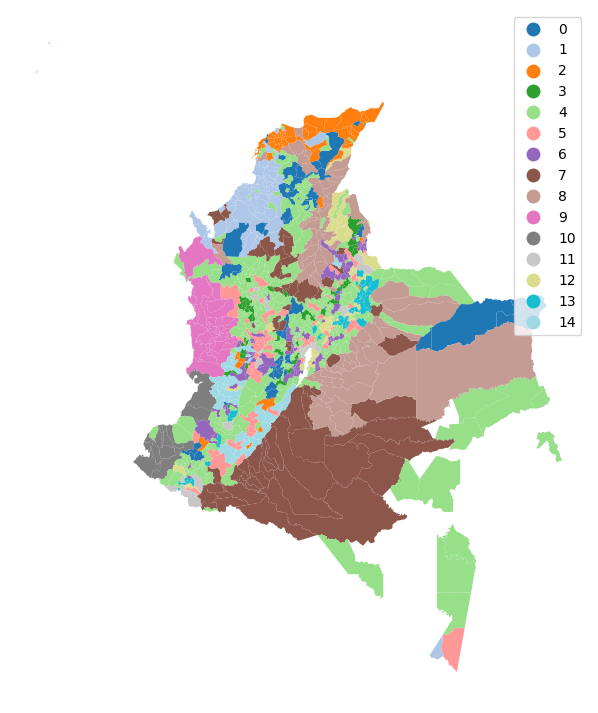

In [78]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios5.plot(
    column="Cluster", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
clusters.to_csv('/content/drive/My Drive/clusters.csv', index=False)

In [31]:
municipios4=pd.merge(municipios2,pivot, left_on='DPTOMPIO', right_on='DPTOMPIO')

In [32]:
db_scaled

array([[ 0.,  0.,  0., ..., 24.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

##Calculando el número de componentes con PCA

In [33]:
base=municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'COD. MUN.','k13cls'])]

In [34]:
mu = base.mean()
sigma = base.std()
Z = (base - mu)/sigma
Z

,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,AJI,AJO,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,1.623728,-0.042582,-0.444966,-0.339406,10.903499,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,4.517517,-0.164975,-0.337564
1,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,1.623728,-0.042582,-0.444966,-0.339406,-0.134560,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,-1.681036,-0.302720,-0.164975,-0.337564
2,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,0.595628,-0.042582,-0.444966,-0.339406,-0.134560,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,-1.681036,-0.302720,-0.164975,-0.337564
3,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.021233,-0.042582,-0.444966,-0.339406,-0.134560,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.277453,-0.302720,-0.164975,-0.337564
4,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,1.212488,-0.042582,-0.444966,-0.339406,-0.134560,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,-0.302720,-0.164975,-0.337564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.843713,-0.042582,-0.444966,-0.094821,-0.134560,...,-0.107382,29.689071,-0.219181,2.489410,-0.030096,-0.102873,0.277453,-0.302720,-0.164975,0.169126
1100,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.843713,-0.042582,1.507227,-0.339406,-0.134560,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,-0.302720,-0.164975,-0.337564
1101,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,0.184388,-0.042582,0.797338,-0.339406,-0.134560,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,1.256697,-0.302720,-0.164975,-0.337564
1102,-0.13123,-0.042582,-0.089401,-0.175474,-0.08401,-0.843713,-0.042582,2.394587,-0.339406,-0.134560,...,-0.107382,-0.040393,-0.219181,-0.071921,-0.030096,-0.102873,0.669150,-0.302720,-0.164975,-0.337564


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


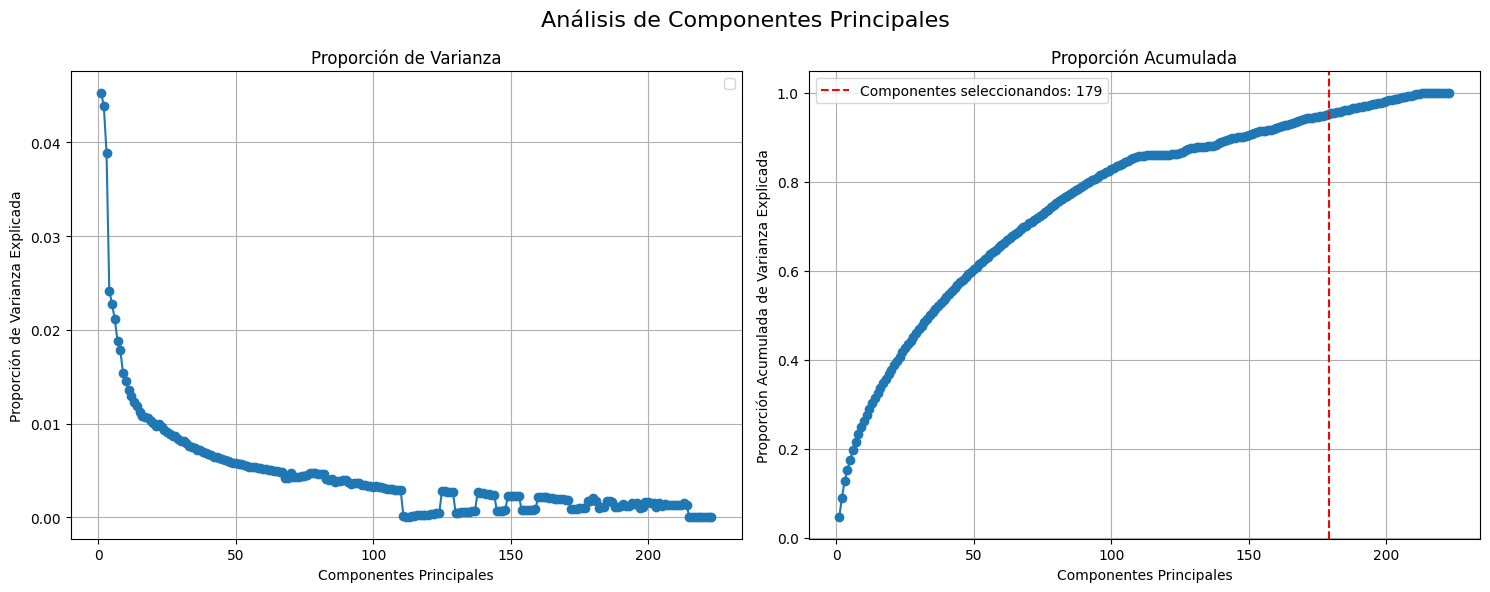

In [35]:
S = Z.cov()
eig_val, eig_vec = np.linalg.eig(S)
eig_val_diag = np.diag(eig_val)
proporcion_varianza_CP = eig_val/sum(eig_val)
# Establece el umbral deseado (por ejemplo, 0.95 para capturar al menos el 95% de la varianza)
umbral = 0.95



# Número de componentes principales mediante examen visual de un gráfico de sedimentación (scree plot).
num_componentes = len(proporcion_varianza_CP)

# Gráfico de scree plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_componentes + 1), proporcion_varianza_CP, marker='o')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
varianza_acumulada = np.cumsum(proporcion_varianza_CP)
# Encuentra el número de componentes principales que cumplen el umbral
num_componentes_seleccionados = np.argmax(varianza_acumulada >= umbral) + 1
plt.plot(range(1, num_componentes + 1), varianza_acumulada, marker='o')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.title('Proporción Acumulada')
plt.grid(True)
plt.axvline(x=num_componentes_seleccionados, color='r', linestyle='--', label=f'Componentes seleccionandos: {num_componentes_seleccionados}')
plt.legend()

plt.suptitle('Análisis de Componentes Principales', fontsize=16)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components = 179).fit_transform(Z)

In [37]:
k13clsPCA = kmeans.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
municipios3["k13clsPCA"] = k13clsPCA.labels_

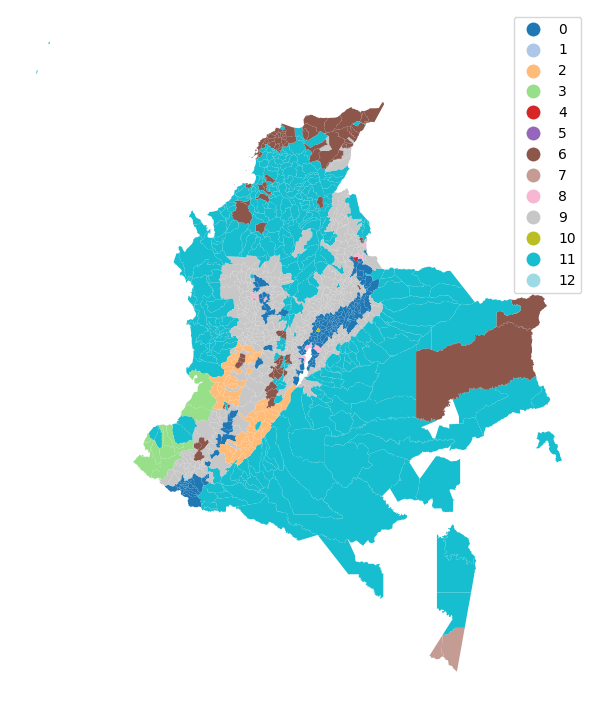

In [39]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k13clsPCA", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [81]:
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 5
initial_centers = kmeans_plusplus_initializer(reduced_data, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(reduced_data, initial_centers, 20)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())

Total WCE: 195173.4604544394


In [82]:
len(clusters)

13

In [42]:
from sklearn.metrics import silhouette_score
K=30
Y={}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, K+1): # Evaluamos entre 1 a 40 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(reduced_data)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(reduced_data, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

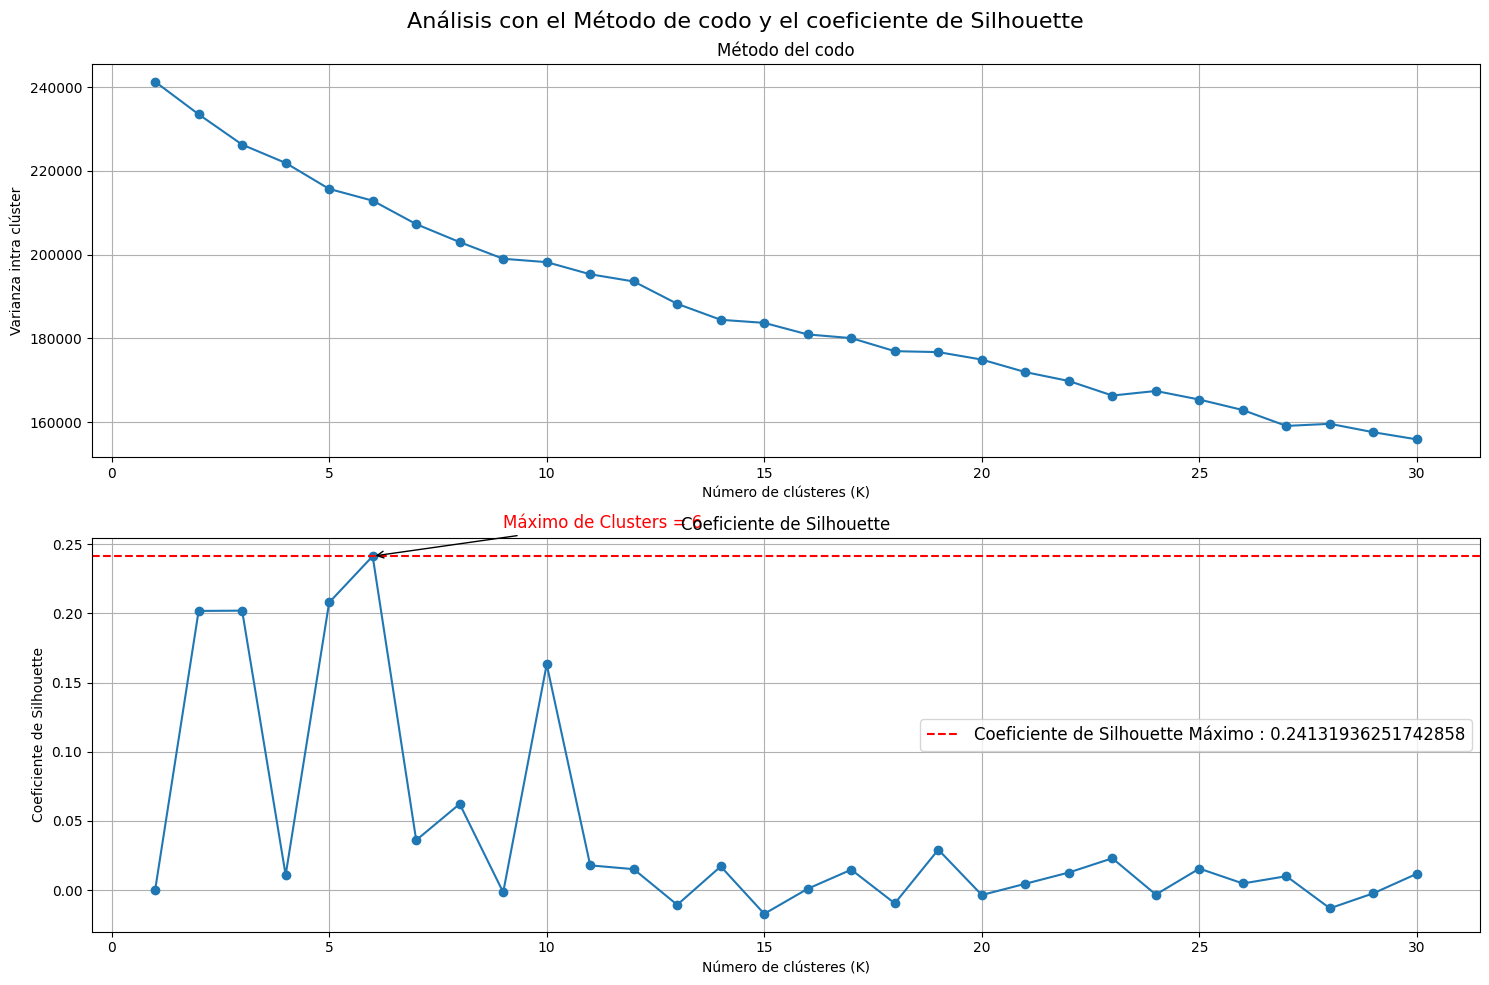

In [43]:
# Crear la figura y los subplots

# Gráfico de scree plot

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(range(1, 31), varianza_intra_cluster, marker='o')
plt.title("Método del codo")
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')

plt.grid()


plt.subplot(2, 1, 2)
plt.plot(range(1, 31), silhouettes, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Coeficiente de Silhouette')
plt.axhline(y=max(silhouettes), color='r', linestyle='--', label=f'Coeficiente de Silhouette Máximo : {max(silhouettes)}')# Encontrar el índice del máximo valor en silhouettes
plt.legend(fontsize=12)

max_silhouette_index = np.argmax(silhouettes) + 1  # Sumamos 1 para convertir el índice en K
max_silhouette_value = max(silhouettes)

plt.annotate(f'Máximo de Clusters = {max_silhouette_index}', xy=(max_silhouette_index, max_silhouette_value), xytext=(max_silhouette_index + 3, max_silhouette_value + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,color='r')  # Ajusta el tamaño de fuente aquí

plt.grid()

plt.suptitle('Análisis con el Método de codo y el coeficiente de Silhouette', fontsize=16)
plt.tight_layout()  # Añadido para mejorar la disposición de los subplots
plt.show()

In [44]:
kmeans10 = KMeans(n_clusters=10)
k10cls = kmeans10.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
municipios3["k10cls"] = k10cls.labels_

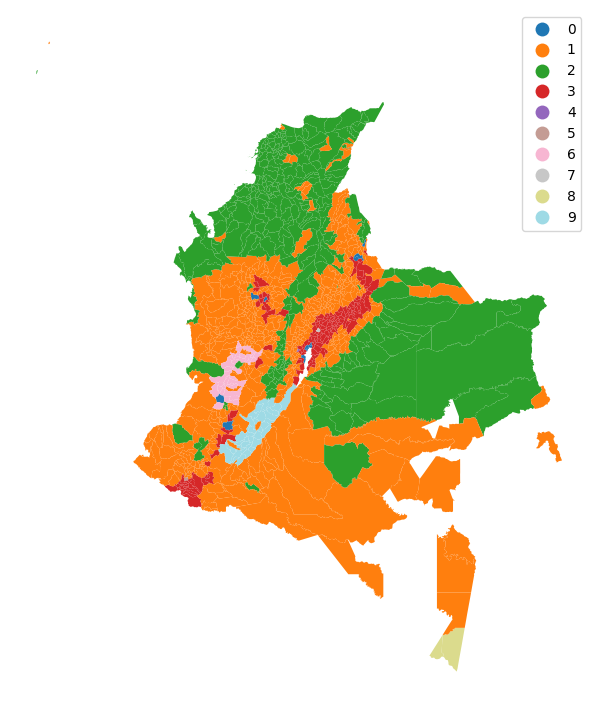

In [46]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k10cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [54]:
kmeans6 = KMeans(n_clusters=6)
k6cls = kmeans6.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


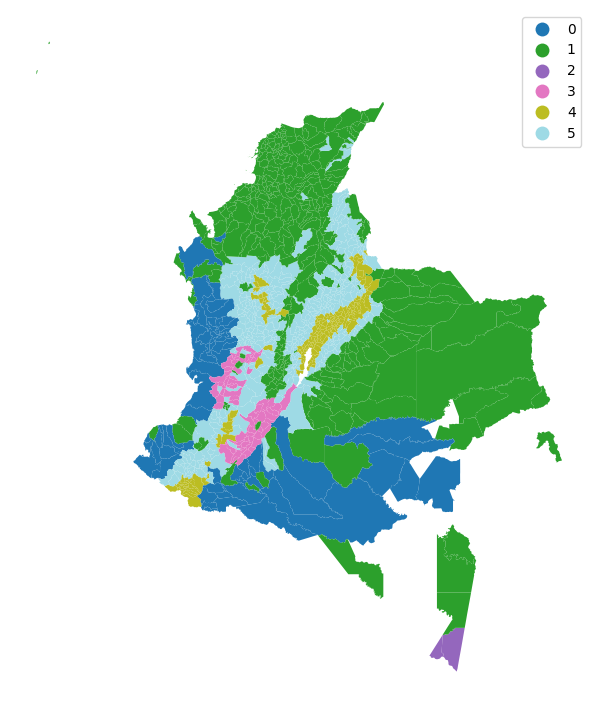

In [55]:
municipios3["k6cls"] = k6cls.labels_
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k6cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()